# Fortune Cookie

Thought [Isaac Slavitt's fortune cookie problem](http://isaacslavitt.com/2016/07/04/stochastic-fortune-cookies/) was a cool use of `PyMC3`:

> I've ignored plenty of fortune cookies in my time, but after lunch the other day I noticed the "lucky numbers" on the back of each fortune cookie and wondered how they were chosen.
> 
> While the lowest number is presumably 1 (which we observed), it was unclear what the maximum lucky number could be. Given the limited number of data points on hand compared to the sample space, it would be hard to address the distribution question directly. But quantifying uncertainty about the maximum number `N` is extremely similar to the [Bayesian German Tank Problem](http://isaacslavitt.com/2015/12/19/german-tank-problem-with-pymc-and-pystan/) tackled in the last post.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import numpy as np
import pandas as pd
import pymc3 as pm
from scipy import stats as st

from utils import plt, sns

In [2]:
data = np.array([
    [35, 26, 56, 10, 32, 52],
    [26, 38, 2, 23, 27, 50],
    [11, 34, 24, 49, 2, 45],
    [14, 1, 55, 19, 32, 45],

    # Sampled these from his Google image search
    [37, 53, 1, 17, 32, 42],
    [26, 55, 25, 51, 11, 27],
])

In [3]:
with pm.Model() as model:
    # Prior
    digit = pm.DiscreteUniform("digit", lower=1, upper=1000)
    # Likelihood
    y = pm.DiscreteUniform("y", lower=1, upper=digit, observed=data.ravel())
    # Need more draws with the Metropolis sampler
    trace = pm.sample(draws=20000, njobs=4, chain=4)
    
burn_in = 10000
trace = trace[burn_in:]

Assigned Metropolis to digit
100%|██████████| 20000/20000 [00:02<00:00, 9029.82it/s]



digit:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  57.243           1.753            0.032            [56.000, 61.000]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  56.000         56.000         57.000         58.000         62.000

None


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10c2f4890>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10c517650>]], dtype=object)

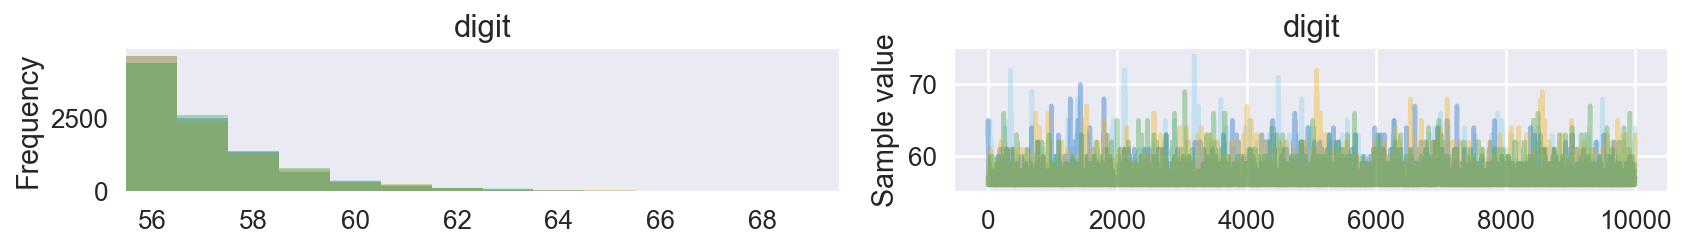

In [4]:
print(pm.summary(trace))
pm.traceplot(trace)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10c726190>], dtype=object)

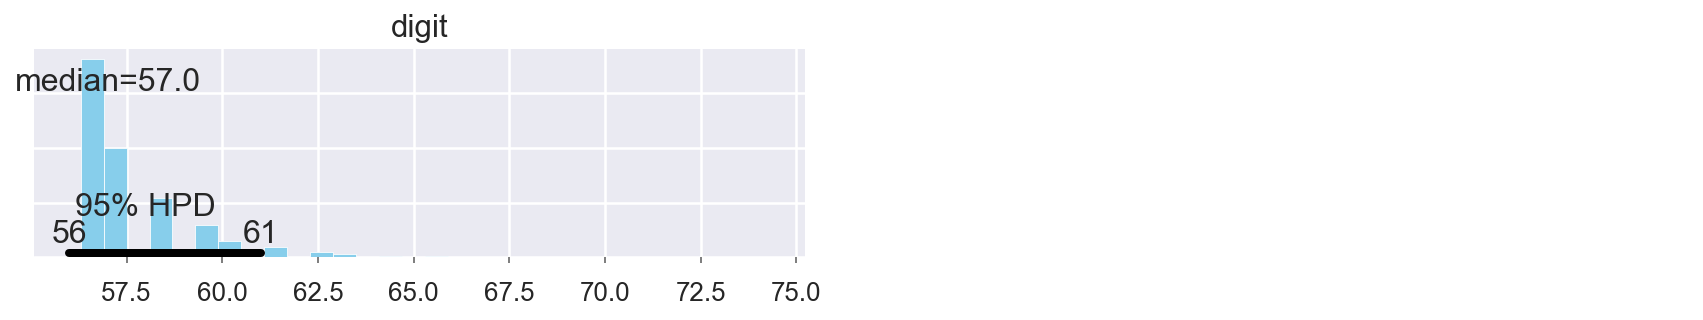

In [5]:
pm.plot_posterior(trace, point_estimate="median")

In [6]:
pm.diagnostics.gelman_rubin(trace)

{'digit': 1.001505313692006}

## Using `Uniform` distributions and the `NUTS` sampler

In [7]:
with pm.Model() as model:
    # Prior
    digit = pm.Uniform("digit", lower=max(data.ravel()), upper=1000)
    # Likelihood
    y = pm.Uniform("y", lower=1, upper=digit, observed=data.ravel())
    # Sample
    trace = pm.sample(draws=6000, njobs=4, chain=4)

burn_in = 2000
trace = trace[burn_in:]

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -150.79: 100%|██████████| 200000/200000 [00:10<00:00, 19806.99it/s]
Finished [100%]: Average ELBO = -150.79
100%|██████████| 6000/6000 [00:04<00:00, 1342.17it/s]



digit:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  57.602           1.634            0.024            [56.000, 60.794]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  56.038         56.447         57.101         58.212         61.990

None


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e13ebd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10e682090>]], dtype=object)

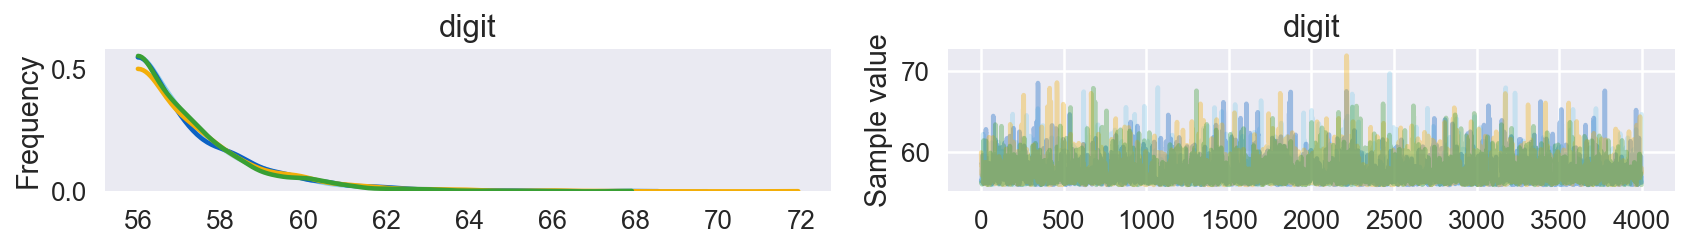

In [8]:
print(pm.summary(trace))
pm.traceplot(trace)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10e8918d0>], dtype=object)

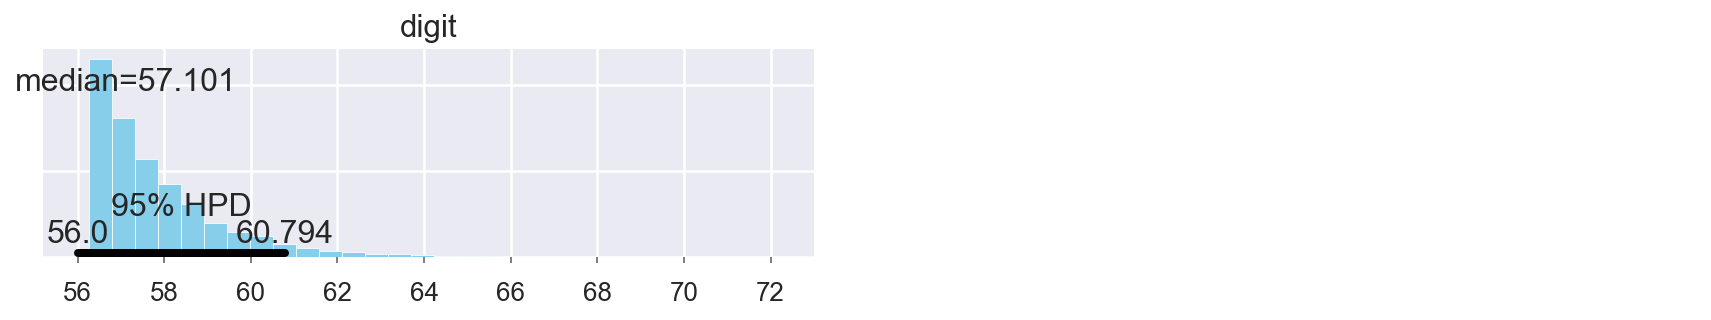

In [9]:
pm.plot_posterior(trace, point_estimate="median")

## Conclusion

Looks like both models predict the highest lottery number we'll see is between `56` and `58`.